In [138]:
import pandas as pd
import vincent

filename = 'CC-EST2014-ALLDATA.csv'

filename ='CO-EST00INT-ALLDATA-01.csv'

#f = open(filename, 'r')

#Data
df_cen = pd.read_csv(filename,encoding='latin-1', dtype={'STATE':str, 'COUNTY':str})
df_cen['FIPS'] = df_cen['STATE']+df_cen['COUNTY']



#df_hpi = pd.read_csv('HPI_AT_metro.txt', sep='\t', dtype={'cbsa':str}) #HPI
#df_map = pd.read_csv('cbsatocountycrosswalk.csv',dtype={'FIPS':str, 'cbsa':str, 'msa':str}) #


#df_z = pd.read_csv('County_Zhvi_AllHomes.csv')
#df_z['StateCodeFIPS'] = df_z.StateCodeFIPS.map("{:02}".format)
#df_z['MunicipalCodeFIPS'] = df_z.MunicipalCodeFIPS.map("{:03}".format)
#df_z['FIPS'] = df_z['StateCodeFIPS']+df_z['MunicipalCodeFIPS']
#df_zpi = df_z[['FIPS','RegionName']]

##average out monthly value to annual value
#for yr in range(2000,2016):
#    yr = str(yr)
#    tmp_list = []
#    for header in list(df_z.columns.values):
#        if yr == header.split('-')[0]:            
#            tmp_list.append(header)
#    df_zpi[yr] = df_z[tmp_list].mean(axis=1)




,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,FIPS
0,50,01,001,Alabama,Autauga County,1,0,576,263,313,...,0,0,0,0,0,0,0,0,0,01001
1,50,01,001,Alabama,Autauga County,1,1,2445,1237,1208,...,3,0,0,0,0,0,0,0,2,01001
2,50,01,001,Alabama,Autauga County,1,2,3622,1875,1747,...,3,1,2,1,0,0,0,1,0,01001
3,50,01,001,Alabama,Autauga County,1,3,3744,1959,1785,...,1,0,0,0,3,0,1,0,0,01001
4,50,01,001,Alabama,Autauga County,1,4,3266,1679,1587,...,1,3,0,0,0,0,0,1,1,01001


In [92]:
df = pd.merge(df_cen, df_map, on='FIPS')
df2 = pd.merge(df, df_hpi, on='cbsa')


C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1090, 49) (3142, 31) (1090, 19)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021189A17710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000211899309E8>]], dtype=object)

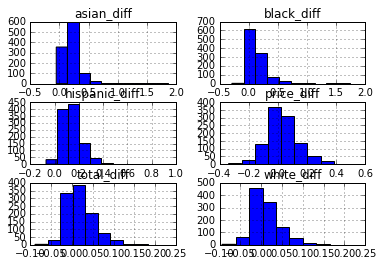

In [136]:
%matplotlib inline  
import pandas as pd





#Census Data
#df_cen = pd.read_csv('CC-EST2014-ALLDATA.csv',encoding='latin-1', dtype={'STATE':str, 'COUNTY':str})
#df_cen['FIPS'] = df_cen['STATE']+df_cen['COUNTY']

#aggregate the population based on ethnicity
df_cen['W']= df_cen['WA_MALE']+df_cen['WA_FEMALE']+df_cen['WAC_MALE']+df_cen['WAC_FEMALE']
df_cen['B']= df_cen['BA_MALE']+df_cen['BA_FEMALE']+df_cen['BAC_MALE']+df_cen['BAC_FEMALE']
df_cen['A']= df_cen['AA_MALE']+df_cen['AA_FEMALE']+df_cen['AAC_MALE']+df_cen['AAC_FEMALE']
df_cen['H']= df_cen['H_MALE']+df_cen['H_FEMALE']+df_cen['HTOM_MALE']+df_cen['HTOM_FEMALE']

#get the subset of census data (all age and years from 2010-2014)
df_cen1 = df_cen[(df_cen['AGEGRP']==0) & (df_cen['YEAR']>2)]
df_cen1 = df_cen1[['FIPS','YEAR','TOT_POP','W','B','A','H']]

#pivot the dataframe on FIPS
df1 = df_cen1.pivot(index='FIPS', columns = 'YEAR') 
df1 = df1.reset_index()
df1.columns = ['FIPS','T2010','T2011','T2012','T2013','T2014','W2010','W2011','W2012','W2013','W2014',
              'B2010','B2011','B2012','B2013','B2014','A2010','A2011','A2012','A2013','A2014',
              'H2010','H2011','H2012','H2013','H2014']

#generate the percent difference between 2010-2014
df1['total_diff'] = (df1['T2014']-df1['T2010'])/df1['T2010']
df1['white_diff'] = (df1['W2014']-df1['W2010'])/df1['W2010']
df1['black_diff'] = (df1['B2014']-df1['B2010'])/df1['B2010']
df1['asian_diff'] = (df1['A2014']-df1['A2010'])/df1['A2010']
df1['hispanic_diff'] = (df1['H2014']-df1['H2010'])/df1['H2010']






#Zillow House Index Data (using zillow since FHFA HPI is at CBSA)
df_z = pd.read_csv('County_Zhvi_AllHomes.csv')

#clean up and generate county FIPS
df_z['StateCodeFIPS'] = df_z.StateCodeFIPS.map("{:02}".format)
df_z['MunicipalCodeFIPS'] = df_z.MunicipalCodeFIPS.map("{:03}".format)
df_z['FIPS'] = df_z['StateCodeFIPS']+df_z['MunicipalCodeFIPS']
df_zpi = df_z[['FIPS','RegionName']]

#average out monthly value to annual value
for yr in range(2000,2016):
    yr = str(yr)
    tmp_list = []
    for header in list(df_z.columns.values):
        if yr == header.split('-')[0]:            
            tmp_list.append(header)
    df_zpi[yr] = df_z[tmp_list].mean(axis=1)

df_zpi['price_diff'] = (df_zpi['2014']-df_zpi['2010'])/df_zpi['2010']

#join the two tables
df = pd.merge(df1, df_zpi, on='FIPS')
print(df.shape, df1.shape, df_zpi.shape)


df[['FIPS','RegionName','price_diff','total_diff','white_diff', 'black_diff', 'asian_diff', 'hispanic_diff']].hist()

#grab remaining census data


#1 validation (even if its not very good) 1 prediction. 
#simple.
#look at region
#when houses go up. predict
#cluster regions together - mean of surrounding region use CBSA

#linear regression? other regression?
#if one region change relative to other, how demographics change

#validate the performance


#plot year x, pop y (broken by demo)
#plot year x, price

#y is price. variable is each type of demographic. 

#plot each separately
#linear regression -> log reg


In [131]:
import pandas as pd
import json
import vincent
from vincent import AxisProperties, PropertySet, ValueRef
vincent.core.initialize_notebook()


#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code munging
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes}, dtype=str)
county_df = county_df.astype(int)

#Read into Dataframe, cast to string for consistency
#df = pd.read_csv('us_county_data.csv', na_values=[' '])
df['FIPS'] = df['FIPS'].astype(int)



#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(df, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')

state_topo = 'us_states.topo.json'
county_topo = 'us_counties.topo.json'

geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'},
            {'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]



vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100, projection='albersUsa',
          data_bind='white_diff', data_key='FIPS',
          map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
vis.to_json('vega.json')

del vis.marks[1].properties.update
vis.marks[0].properties.update.fill.value = '#fff'
vis.marks[1].properties.enter.stroke.value = '#000'
vis.marks[0].properties.enter.stroke.value = '#808080'

#vis.legend(title='HPA')

#vis.scales['color'].type = 'threshold'
#vis.scales['color'].domain = [ 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1]

#savefig('test.png')

vis.display()

In [143]:
county_topo = 'us_counties.topo.json'
state_topo = 'us_states.topo.json'


geo_data = [{'name': 'states',
             'url': state_topo,
             'feature': 'us_states.geo'}]

#geo_data = [{'name': 'counties',
#             'url': county_topo,
#             'feature': 'us_counties.geo'}]

vis = vincent.Map(geo_data=geo_data, scale=1000, projection='albersUsa')

vis.display()

In [141]:
import os

file_dir = r'C:\Users\Noah\Desktop\python\census\data\\'

#read all census data

df_cen = pd.read_csv('CC-EST2014-ALLDATA.csv',encoding='latin-1', dtype={'STATE':str, 'COUNTY':str})


for filename in os.listdir(file_dir):
    tmp = pd.read_csv(file_dir+filename,encoding='latin-1', dtype={'STATE':str, 'COUNTY':str})

    df_cen.append(tmp)



